In [4]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

^C


In [18]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [8]:
df = pd.read_csv("train.csv")

In [9]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [10]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.3.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        22.2.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
cachetools                   5.2.1
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           2.1.1
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.6
cycler                       0.11.0
debugpy                      1.6.5
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
executing                    1.2.0
fastjsonschema               2.16.2
flatbuffers                  23.1.4
fo

You should consider upgrading via the 'C:\Users\kaurg\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [11]:
from tensorflow.keras.layers import TextVectorization

In [12]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [13]:
MAX_FEATURES = 200000 # number of words in the vocab

In [14]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [15]:
vectorizer.adapt(X.values)

In [16]:
vectorized_text = vectorizer(X.values)

In [19]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [20]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [22]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [23]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [27]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 80730s 12s/step - loss: 0.0540 - val_loss: 0.0462


In [28]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

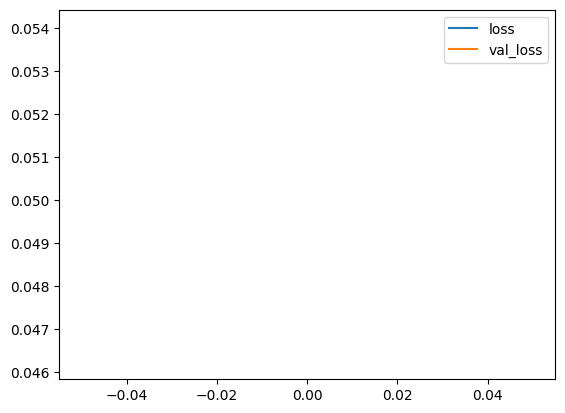

In [29]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [37]:

from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [39]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 168ms/step


In [40]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.7429841756820679, Recall:0.7644368410110474, Accuracy:0.4874624013900757


In [41]:
!pip install gradio jinja2

     --------------------------------------- 14.2/14.2 MB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 71.5/71.5 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 812.8/812.8 KB 12.7 MB/s eta 0:00:00
     ------------------------------------- 202.7/202.7 KB 12.0 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 12.2 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 11.3 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 KB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 KB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 101.4/101.4 KB ? eta 0:00:00
     ---------------------------------------- 56.9/56.9 KB ? eta 0:00:00
     -----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\kaurg\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [42]:
import tensorflow as tf
import gradio as gr

In [43]:

model.save('toxicity.h5')

In [44]:
model = tf.keras.models.load_model('toxicity.h5')

In [45]:
input_str = vectorizer('hey you really suck at making videos!')

In [46]:

res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 606ms/step


In [47]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [48]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

C:\Users\kaurg\AppData\Local\Programs\Python\Python39\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\kaurg\AppData\Local\Programs\Python\Python39\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\kaurg\AppData\Local\Programs\Python\Python39\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [49]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://b0959d6b-a7d2-4534.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
